# Chapter 1: Introduction

This Sage notebook supplements [Chapter 1 of An Invitation to Enumeration](https://enumeration.ca/basics/introduction/) by Stephen Melczer, available on [enumeration.ca](https://enumeration.ca).

An introduction to Sage can be downloaded as a [Sage notebook here](https://git.uwaterloo.ca/smelczer/intro-to-sage/-/raw/master/A%20Brief%20Introduction%20to%20Sage.ipynb?inline=false) or as a [static HTML file here](https://melczer.ca/files/SageIntro.html).

# Code to Explore
The code in this section helps illustrate topics from the text.

### Virhanka-Fibonacci Numbers

In [1]:
print('We can compute v_n by taking a series expansion of the rational function')
F = 1/(1-x-x^2)
show('F = ', F)
print("whose series expansion at the origin begins")
print(F.series(x,6))

We can compute v_n by taking a series expansion of the rational function


'F = ' -1/(x^2 + x - 1)

whose series expansion at the origin begins
1 + 1*x + 2*x^2 + 3*x^3 + 5*x^4 + 8*x^5 + Order(x^6)


In [2]:
# We can compute many terms 
F.series(x,100)

1 + 1*x + 2*x^2 + 3*x^3 + 5*x^4 + 8*x^5 + 13*x^6 + 21*x^7 + 34*x^8 + 55*x^9 + 89*x^10 + 144*x^11 + 233*x^12 + 377*x^13 + 610*x^14 + 987*x^15 + 1597*x^16 + 2584*x^17 + 4181*x^18 + 6765*x^19 + 10946*x^20 + 17711*x^21 + 28657*x^22 + 46368*x^23 + 75025*x^24 + 121393*x^25 + 196418*x^26 + 317811*x^27 + 514229*x^28 + 832040*x^29 + 1346269*x^30 + 2178309*x^31 + 3524578*x^32 + 5702887*x^33 + 9227465*x^34 + 14930352*x^35 + 24157817*x^36 + 39088169*x^37 + 63245986*x^38 + 102334155*x^39 + 165580141*x^40 + 267914296*x^41 + 433494437*x^42 + 701408733*x^43 + 1134903170*x^44 + 1836311903*x^45 + 2971215073*x^46 + 4807526976*x^47 + 7778742049*x^48 + 12586269025*x^49 + 20365011074*x^50 + 32951280099*x^51 + 53316291173*x^52 + 86267571272*x^53 + 139583862445*x^54 + 225851433717*x^55 + 365435296162*x^56 + 591286729879*x^57 + 956722026041*x^58 + 1548008755920*x^59 + 2504730781961*x^60 + 4052739537881*x^61 + 6557470319842*x^62 + 10610209857723*x^63 + 17167680177565*x^64 + 27777890035288*x^65 + 44945570212853*

In [3]:
# Compare this to terms generated with the recurrence
def fib_rec(n):
    if n==0 or n==1:
        return 1;
    else:
        return fib_rec(n-1) + fib_rec(n-2)

print([fib_rec(k) for k in range(10)])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [4]:
# However, it is much faster to use the matrix code discussed in the Chapter
M = Matrix(ZZ,2,2,[1,1,1,0]) # matrix with rows [1,1] and [1,0]
def bin_pow(n):
    if n == 1:     return M
    elif n%2 == 0: return bin_pow(n/2)^2
    else:          return bin_pow((n-1)/2)^2*M

def fib(n):        return add(bin_pow(n)[1])

timeit('fib(10^6)')	# compute v_(10^6)

25 loops, best of 3: 11.2 ms per loop

In [5]:
# Compared to other methods, the matrix method is much faster
print(timeit('fib_rec(20)')) # 10^2 takes a long time
print(timeit('(1/(1-x-x^2)).series(x,10^4)')) # 10^5 takes a long time

25 loops, best of 3: 8.63 ms per loop
5 loops, best of 3: 45.9 ms per loop


In [6]:
# Verify all methods give same sequence
print([fib_rec(n) for n in range(20)])
print([k for [k,_] in (1/(1-x-x^2)).series(x,20).coefficients()])
print([1] + [fib(n) for n in range(1,20)])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


### Catalan Numbers

In [7]:
# We define the generating function of the Catalan numbers
# First, tell Sage that "z" is a variable
var('z') 

# Now define the function and print series coefficients
C = (1 - sqrt(1-4*z))/2/z
C.series(z,10)

1 + 1*z + 2*z^2 + 5*z^3 + 14*z^4 + 42*z^5 + 132*z^6 + 429*z^7 + 1430*z^8 + 4862*z^9 + Order(z^10)

In [8]:
# These coefficients match the formula from the text
[binomial(2*n,n)/(n+1) for n in range(10)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

In [9]:
# If your Sage installation has access to the internet, 
# you can look up this sequence by running the command 
# oeis([binomial(2*n,n)/(n+1) for n in range(10)])

# Code to Generate Material
The code in this section was used to create figures, animations, or results discussed in the text.

### Generate Walks in the Quarter Plane

In [10]:
# First, we define all the functions to compute the walk and plot its output

# Generate endpoints of random walk using steps in Steps 
def walkSum(Steps):
    wk = [[0, 0]]
    for k in Steps:
        wk.append([wk[-1][0]+k[0],wk[-1][1]+k[1]])
    return wk

# Find index walk wk leaves non-negative quadrant
def leaveIndex(wk):
    for k in range(len(wk)):
        if (wk[k][0]<0) or (wk[k][1]<0):
            return k;
    return len(wk)+1;

# Plot the state of the random walk wk at time k
# bd denotes the plot boundaries
def singlePlot(wk, k, bd):
    if k < leaveIndex(wk):
        oldSteps = line(wk[0:k], color='black', thickness=2)
        newSteps = line(wk[k-1:k+1], color='red', thickness=2)
    else:
        oldSteps = line(wk[0:k], alpha=0.03, color='gray')
        newSteps = line(wk[k-1:k+1], alpha=0.03, color='gray', thickness=2)
    return oldSteps + newSteps

# Plot the state of all random walks in WK at time k
# bd denotes the plot boundaries
def singleListPlot(WK, k, bd):
    plt = line([])
    for wk in WK:
        plt += singlePlot(wk,k,bd)
    
    # Define header text
    plt.set_axes_range(xmin=-bd,xmax=bd, ymin=-bd,ymax=bd)
    numLeft = len(list(filter(lambda x:leaveIndex(x)>k,WK)))
    txt = text("Number of steps: %s" %(k),(0,1.05),axis_coords=True, horizontal_alignment="left")
    txt += text("Walks in first quadrant: %s" %(numLeft),(0,1),axis_coords=True,horizontal_alignment="left")
    
    # Add plots and text, and set boundaries and aspect ratio
    plt = plt + txt
    plt.set_axes_range(xmin=-bd,xmax=bd, ymin=-bd,ymax=bd)
    return plt

# Sequence of plots of first N steps of the random walks in WK
# bd denotes the plot boundaries
def plotWalk(WK, N, bd):
    return [singleListPlot(WK,k,bd) for k in range(1,N+1)]

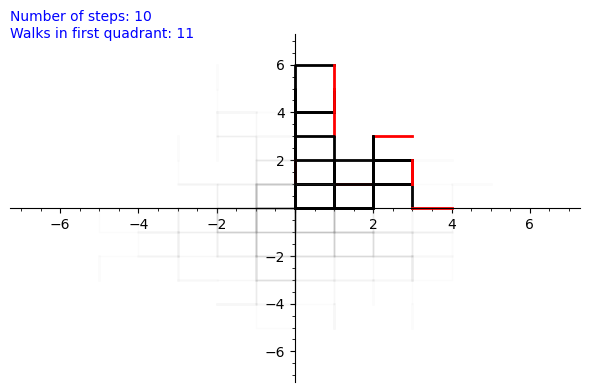

In [11]:
# This code runs the above functions and animates the results

# Define set of steps
ST = [[1,0],[-1,0],[0,1],[0,-1]]

# Define parameters K (number of walks) and N (number of steps)
K = 100
N = 10

# Generate steps for K random walks of length N 
StepSeq = [[choice(ST) for k in range(N)] for j in range(K)]

# Generate the random walks and find maximum coordinate
WK = [walkSum(Steps) for Steps in StepSeq]
bd = max(flatten(WK))

# Get sequence of plots and convert to Sage Animation class
ani = animate(plotWalk(WK, N, bd+1))

# Here we just display the final frame
ani[-1]

# To save an animation in Sage, need imagemagick installed
# On a Mac with Homebrew, run "brew install imagemagick" in the terminal
# Then uncomment and run the following two lines
# (the first should be the path to imagemagick)

#os.environ["PATH"]+=":/usr/local/bin"
#ani.save("WalkAnimation.mp4")

### Average Runtime of Quicksort

In [12]:
# Function returning average cost of quicksort on random permutation of size n
def qsortcost(n):
    return (2*(n+1)*sum([1/k for k in range(1,n+1)]) - 4*n).n()

# Function returning sorted version of array via quicksort, and number of comparisons used 
def qsort(arr):
    left = []
    equal = []
    right = []

    if len(arr) <= 1:
        return (arr, 0)
    else:
        pivot = arr[0]
        for x in arr[1:]:
            if x < pivot:
                left.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                right.append(x)
        
        lsort, lcomp = qsort(left)
        rsort, rcomp = qsort(right)
        return lsort + equal + rsort, lcomp + rcomp + len(arr)-1

# Return plot of average comparisons obtained by running quicksort on K random 
# permutations of size N, compared to actual average
def qsortExperiment(N,K):
    LST = [qsort(Permutations(N).random_element())[1] for _ in range(K)]

    sums = [LST[0]]
    for k in LST[1:]:
        sums.append(k+sums[-1])

    plt = point([1,sums[0]/1])
    for k in range(len(sums)):
        plt += point([k+1,sums[k]/(k+1)])
    
    return plt + line([[0,qsortcost(N)],[K,qsortcost(N)]], color='red')

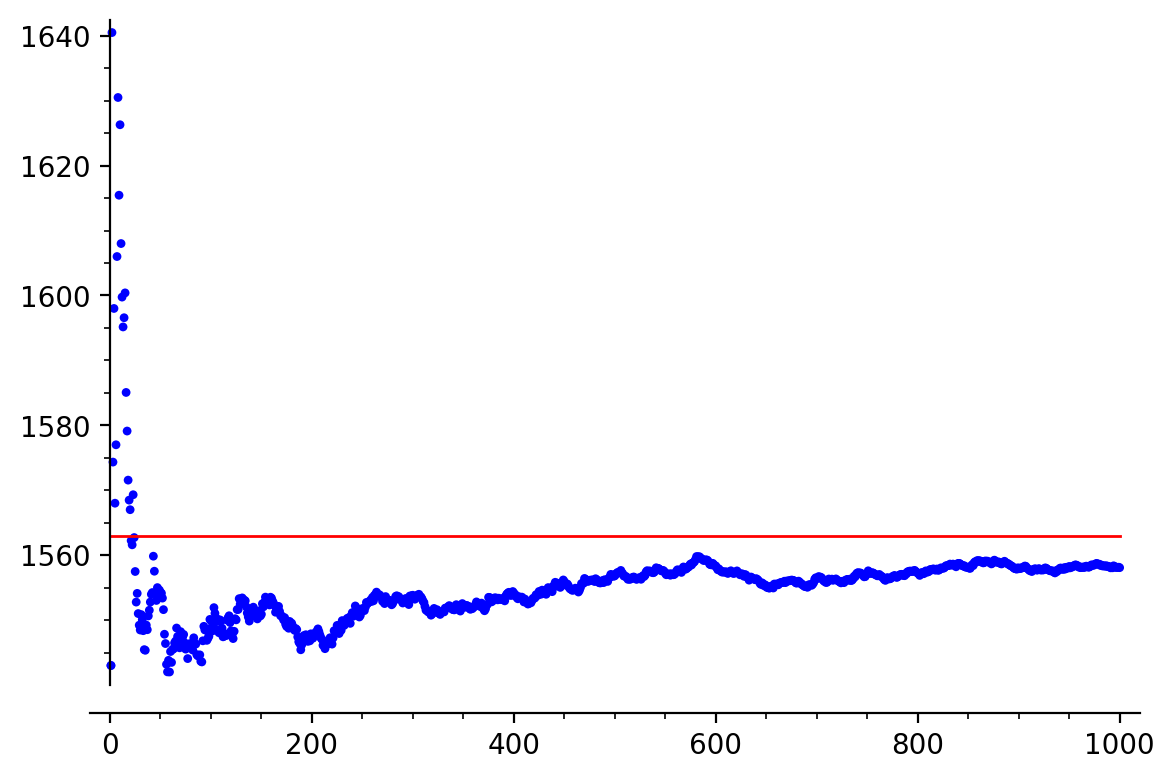

In [13]:
show(qsortExperiment(200,1000),dpi=200)

### Euclidean Algorithm Limit Theorem

In [14]:
# Define the polynomial ring GF(p)[x]
# CHANGE THE PRIME HERE IF YOU WANT TO PLAY AROUND
p = 3
R = PolynomialRing(GF(p),'x')
S = Integers(p)
x = R.gen()

# EASteps(A,B,0) returns the number of steps the Euclidean algorithm 
# takes for the polynomials A and B
def EASteps(A,B,steps):
    if B == 0: 
        return steps
    (q,r) = A.quo_rem(B)
    return EASteps(B,r,steps+1)

# Generate uniformly random polynomial of degree at most D
def rpol(D):
    return add([S.random_element() * x^k for k in range(D+1)])

# Returns the number of steps the Euclidean algorithm takes for a 
# random pair of polynomials with the larger one monic of degree D
def randomEASteps(D):
    f = x^D + rpol(D-1)
    g = rpol(D-1)
    return EASteps(f,g,0)

# Define limiting density
var('s n P')
density = sqrt(2)*exp(-n*(s/n-1+1/P)^2*P^2/(2*(P-1)))/(2*sqrt(pi*n)*sqrt((P-1)/P^2))
show("The limiting density for the Euclidean Algorithm on polynomial pairs in \t", R," is \t", density.subs(P=p))

'The limiting density for the Euclidean Algorithm on polynomial pairs in \t' Univariate Polynomial Ring in x over Finite Field of size 3 ' is \t' 3/2*e^(-1/4*n*(3*s/n - 2)^2)/sqrt(pi*n)

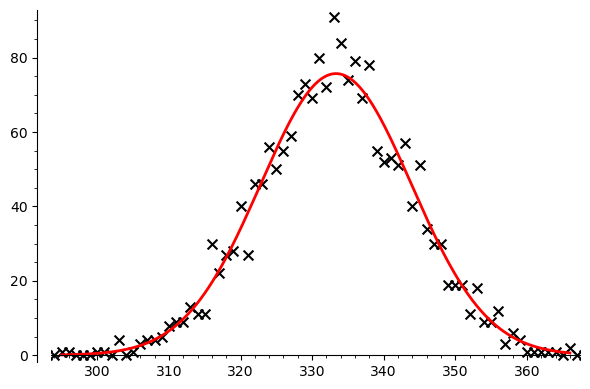

In [15]:
# First, we just plot the result of dividing random polys compared to limit curve
# Set maximum degree (N) and number of pairs (K) of polynomials to generate
# With the default p = 3, N = 500, and K = 2000 this should take 5 - 10 seconds
# CHANGE N and K HERE IF YOU WANT TO PLAY AROUND
N = 500
K = 2000

# Generate list of step counts
lst = [randomEASteps(N) for k in range(K)]

# Plot the count of points
p1 = plot(point([(k,lst.count(k)) for k in range(N)],size=50,marker="x", color="black"))
# Plot the limiting density (scaled to count divisions instead of probabilities)
p2 = plot(K*density.subs(n=N,P=p),(min(lst),max(lst)), color="red", thickness=2)
# Superimpose the plots
pt = p1 + p2
# Set the axes of the plot
pt.axes_range(xmin=min(lst),xmax=max(lst),ymin=0,ymax=pt.get_minmax_data()['ymax'])
# Display the plot on screen
pt

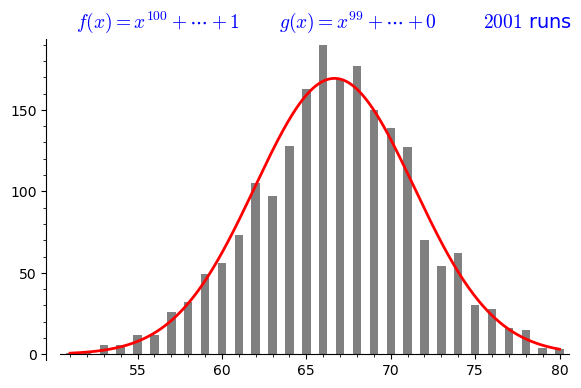

In [16]:
# Now we do the animation
# Returns the number of steps the Euclidean algorithm takes for a 
# random pair of polynomials with the larger one monic of degree D
# *and* the polynomials used
def randomEAStepsfg(D):
    f = x^D + rpol(D-1)
    g = rpol(D-1)
    return f,g,EASteps(f,g,0)

# Set maximum degree (N) and number of pairs (K) of polynomials to generate
# CHANGE N and K HERE IF YOU WANT TO PLAY AROUND
N = 100
K = 2000

# Generate and record a sequence of K polynomial pairs with max degree N,
# together with the count of divisions performed by the Euclidean Algorithm
f_lst = []
g_lst = []
ct_lst = []
for step in range(K+1):
    f, g, ct = randomEAStepsfg(N)
    f_lst += [f]
    g_lst += [g]
    ct_lst += [ct]

# Generate a list of plots animating the running count of divisions 
# compared to the expected count from the limit density
PT = []
ym = -1
for L in range(201):
    step = 10*L
    p1 = bar_chart([ct_lst[0:step+1].count(k) for k in range(N)], color='gray')
    p2 = plot((step+1)*density.subs(n=N,P=p),(min(ct_lst),max(ct_lst)), color="red", thickness=2)
    pt = p1 + p2
    ym = max(ym,pt.get_minmax_data()['ymax'])
    F = f_lst[step]
    G = g_lst[step]
    pt += text("$%s$" %("f(x) = " + latex(F.lt()) + "+ \\cdots +" + latex(F.constant_coefficient())),(0.03,1.05),axis_coords=True, horizontal_alignment="left", fontsize=14)
    pt += text("$%s$"  %("g(x) = " + latex(G.lt()) + "+ \\cdots +" + latex(G.constant_coefficient())),(0.43,1.05),axis_coords=True, horizontal_alignment="left", fontsize=14)
    pt += text("$%s$ runs"  %(step+1),(0.83,1.05),axis_coords=True, horizontal_alignment="left", fontsize=14)
    pt.axes_range(xmin=min(ct_lst),xmax=max(ct_lst),ymin=0,ymax=ym)
    PT += [pt]

# Generate an animation object from the list of plots
ani = animate(PT)

# Here we just display the final frame
ani[-1]

# Output and save the animation -- this *requires* extra software such as ImageMagick or ffmpeg
# Uncomment and run the following line to save the animation
# ani.save("EuclidAnimation.mp4")